# Importing Libraries

In [1]:
pip install numpy

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install ipywidgets

In [6]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


# Importing Module

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [3]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Libraries for plotting:


In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
    
    xmax=max([xtrain.max(), xtest.max()])
    xmin=min([xtrain.min(), xtest.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2>1.) Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [7]:
y_data = df["price"]
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [8]:
x_data = df.drop("price", axis = 1)
x_data

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,10.217391,0,1
197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,12.368421,0,1
198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,13.055556,0,1
199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,9.038462,1,0


Spliting the data into test and train sets

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

In [10]:
x_train

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
159,159,159,1,168,94.5,0.810668,0.888889,52.6,2169,98,3.19,3.03,9.0,70.0,4800.0,29,34,8.103448,0,1
16,16,16,0,122,110.0,0.946660,0.984722,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,15.666667,0,1
108,108,108,0,161,107.9,0.897165,0.950000,56.7,3075,120,3.46,2.19,8.4,95.0,5000.0,19,24,12.368421,0,1
31,31,31,1,101,93.7,0.720807,0.888889,52.6,1837,79,2.91,3.07,10.1,60.0,5500.0,38,42,6.184211,0,1
44,44,44,0,145,113.0,0.959154,0.966667,52.8,4066,258,3.63,4.17,8.1,176.0,4750.0,15,19,15.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,133,133,2,104,99.1,0.896684,0.923611,56.1,2847,121,3.54,3.07,9.0,160.0,5500.0,19,26,12.368421,0,1
137,137,137,0,102,97.2,0.826526,0.908333,52.5,2145,108,3.62,2.64,9.5,82.0,4800.0,32,37,7.343750,0,1
72,72,72,1,122,102.7,0.857280,0.944444,54.8,2910,140,3.78,3.12,8.0,175.0,5000.0,19,24,12.368421,0,1
140,140,140,0,102,97.0,0.826526,0.908333,54.3,2385,108,3.62,2.64,9.0,82.0,4800.0,24,25,9.791667,0,1


In [11]:
x_test

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
97,97,97,0,106,97.2,0.833253,0.905556,54.7,2302,120,3.33,3.47,8.5,97.0,5200.0,27,34,8.703704,0,1
117,117,117,1,154,93.7,0.755887,0.886111,50.6,1967,90,2.97,3.23,9.4,68.0,5500.0,31,38,7.580645,0,1
59,59,59,0,115,98.8,0.854397,0.923611,55.5,2410,122,3.39,3.39,8.6,84.0,4800.0,26,32,9.038462,0,1
35,35,35,0,78,96.5,0.754926,0.887500,58.3,2024,92,2.92,3.41,9.2,76.0,6000.0,30,34,7.833333,0,1
165,165,165,2,134,98.4,0.846708,0.911111,52.0,2551,146,3.62,3.50,9.3,116.0,4800.0,24,30,9.791667,0,1
147,147,147,1,87,95.7,0.762614,0.883333,54.5,2040,92,3.05,3.03,9.0,62.0,4800.0,31,38,7.580645,0,1
28,28,28,3,145,95.9,0.832292,0.920833,50.2,2811,156,3.60,3.90,7.0,145.0,5000.0,19,24,12.368421,0,1
78,78,78,3,153,96.3,0.831331,0.908333,49.4,2328,122,3.35,3.46,8.5,88.0,5000.0,25,32,9.400000,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1
18,18,18,1,98,94.5,0.749159,0.883333,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,6.184211,0,1


In [12]:
y_train.to_frame()

,price
159,8058.0
16,36880.0
108,15580.0
31,5399.0
44,32250.0
...,...
133,18620.0
137,7126.0
72,16503.0
140,9233.0


In [13]:
y_test.to_frame()

,price
97,9549.0
117,6229.0
59,10245.0
35,7295.0
165,9989.0
147,6338.0
28,12964.0
78,8499.0
4,17450.0
18,6295.0


Counting number of rows in each test and train:

In [14]:
print("The number of values is x_test",x_test.shape[0])
print("The number of values is x_train",x_train.shape[0])

The number of values is x_test 21
The number of values is x_train 180


We can see that the test is approximately 10% of total dataframe as defined by us in <code>test_size</code>

<h1> Question  1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

In [16]:
print("The number of values is x_test1",x_test1.shape[0])
print("The number of values is x_train1",x_train1.shape[0])

The number of values is x_test1 81
The number of values is x_train1 120


We can see that the test is approximately 40% of total dataframe as defined by us in <code>test_size</code>

In [17]:
x_train1

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
46,46,46,0,122,102.0,0.921192,0.980556,47.8,3950,326,3.54,2.76,11.5,262.0,5000.0,13,17,18.076923,0,1
138,138,138,0,102,97.2,0.826526,0.908333,52.5,2190,108,3.62,2.64,9.5,82.0,4400.0,28,33,8.392857,0,1
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,10.217391,0,1
108,108,108,0,161,107.9,0.897165,0.950000,56.7,3075,120,3.46,2.19,8.4,95.0,5000.0,19,24,12.368421,0,1
62,62,62,0,118,104.9,0.840942,0.918056,54.4,2670,140,3.76,3.16,8.0,120.0,5000.0,19,27,12.368421,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,67,-1,93,115.6,0.973570,0.995833,56.3,3770,183,3.58,3.64,21.5,123.0,4350.0,22,25,10.681818,1,0
192,192,192,-2,103,104.3,0.907256,0.933333,56.2,2935,141,3.78,3.15,9.5,114.0,5400.0,24,28,9.791667,0,1
117,117,117,1,154,93.7,0.755887,0.886111,50.6,1967,90,2.97,3.23,9.4,68.0,5500.0,31,38,7.580645,0,1
47,47,47,1,104,93.1,0.764536,0.891667,54.1,1890,91,3.03,3.15,9.0,68.0,5000.0,30,31,7.833333,0,1


In [18]:
x_test1

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
18,18,18,1,98,94.5,0.749159,0.883333,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,6.184211,0,1
170,170,170,-1,65,102.4,0.843825,0.923611,54.9,2480,110,3.27,3.35,22.5,73.0,4500.0,30,33,7.833333,1,0
107,107,107,0,122,114.2,0.955790,0.950000,58.7,3430,152,3.70,3.52,21.0,95.0,4150.0,25,25,9.400000,1,0
98,98,98,0,128,100.4,0.873138,0.923611,55.1,3095,181,3.43,3.27,9.0,152.0,5200.0,17,22,13.823529,0,1
177,177,177,-1,122,104.5,0.902451,0.923611,54.1,3151,161,3.27,3.35,9.2,156.0,5200.0,19,24,12.368421,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,109,0,161,107.9,0.897165,0.950000,56.7,3252,152,3.70,3.52,21.0,95.0,4150.0,28,33,8.392857,1,0
14,14,14,0,122,103.5,0.908217,0.929167,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,14.687500,0,1
27,27,27,-1,110,103.3,0.839020,0.897222,59.8,2535,122,3.34,3.46,8.5,88.0,5000.0,24,30,9.791667,0,1
141,141,141,0,102,97.0,0.826526,0.908333,54.3,2510,108,3.62,2.64,7.7,111.0,4800.0,24,29,9.791667,0,1


In [19]:
y_train1.to_frame()

,price
46,36000.0
138,7775.0
196,16845.0
108,15580.0
62,18280.0
...,...
67,31600.0
192,15985.0
117,6229.0
47,5195.0


In [20]:
y_test1.to_frame()

,price
18,6295.0
170,10698.0
107,13860.0
98,13499.0
177,15750.0
...,...
109,16900.0
14,30760.0
27,8921.0
141,11259.0


Now we fit the model and predict it with test data

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train[["horsepower"]],y_train)
lm.predict(x_test[["horsepower"]])

array([12181.59430333,  7169.77316037,  9934.91585993,  8552.34451015,
       15465.20125905,  6132.84464804, 20477.02240201, 10626.20153482,
       15292.37984033,  7515.41599782, 11317.48720971,  8552.34451015,
       15465.20125905, 16329.30835267, 14601.09416544, 12181.59430333,
        5441.55897314, 13736.98707183,  7342.59457909, 10107.73727865,
       10280.55869738])

Let's calculate the R^2 on the test data:


In [22]:
lm.score(x_test[["horsepower"]], y_test)

0.36358755750788263

In [23]:
lm.score(x_train[["horsepower"]], y_train)

0.6619724197515104

We can see the R^2 is much smaller using the test data compared to the training data.


<h1> Question  2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>

In [24]:
lm.fit(x_train1[["horsepower"]], y_train1)
lm.predict(x_test1[["horsepower"]])

array([ 7702.88282951,  8158.10316414, 11496.38561812, 20145.57197615,
       20752.53242233,  9978.98450268, 13772.48729129,  6488.96193716,
       15441.62851828,  7702.88282951,  9827.24439113, 28491.27811109,
        4971.56082171,  5578.52126789, 19083.39119534, 13772.48729129,
        8613.32349878, 13772.48729129, 10130.72461422,  7399.40260642,
        7399.40260642, 13924.22740283, 23787.33465322,  7702.88282951,
        6792.44216025, 28491.27811109,  9978.98450268, 10737.6850604 ,
       18779.91097225, 23787.33465322, 24697.77532248, 17565.9900799 ,
        6488.96193716, 11496.38561812, 12558.56639893, 10434.20483731,
       13772.48729129, 14531.18784901, 10434.20483731, 11799.86584121,
        7551.14271797, 15745.10874136, 12558.56639893, 11496.38561812,
       14682.92796055,  8006.3630526 , 18324.69063762,  7399.40260642,
        7399.40260642, 11344.64550658, 25001.25554557, 28491.27811109,
       12255.08617584, 11799.86584121,  6488.96193716,  7399.40260642,
      

Calculating the R^2 Value:

In [25]:
lm.score(x_test1[["horsepower"]],y_test1)

0.7139364665406973

In [26]:
lm.score(x_train1[["horsepower"]],y_train1)

0.5754067463583004

If we use large dataset for training and less for testing, we get a high accuracy but low precision. Whereas to increase precision, we can use more dataset for testing. This will result in high precision but low accuracy

To overcome this, we use Cross Validation Method

<h2>Cross-Validation Score</h2>


This method returns an array of R^2 Score of each fold.

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
Rcross = cross_val_score(lm, x_data[["horsepower"]], y_data, cv=4)

In [29]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [30]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


<h1> Question  3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>

In [31]:
Rcross1 = cross_val_score(lm, x_data[["horsepower"]], y_data, cv=2)

In [32]:
Rcross1

array([0.59015621, 0.44319613])

In [33]:
print("The mean of the folds are", Rcross1.mean(), "and the standard deviation is" , Rcross1.std())

The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385


<h2>Cross-Validation Predict</h2>


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [34]:
from sklearn.model_selection import cross_val_predict

Yhat = cross_val_predict(lm, x_data[["highway-mpg"]], y_data, cv = 4)
Yhat[0:4]

array([15702.62111965, 15702.62111965, 16477.14151726, 13379.05992683])

<h2 id="ref2"> 2.) Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [35]:
lm = LinearRegression()
lm.fit(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]], y_train)

LinearRegression()

Prediction from train data:

In [36]:
yhat_train = lm.predict(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction from test data:

In [37]:
yhat_test = lm.predict(x_test[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Ploting the distribution plot for training data:

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


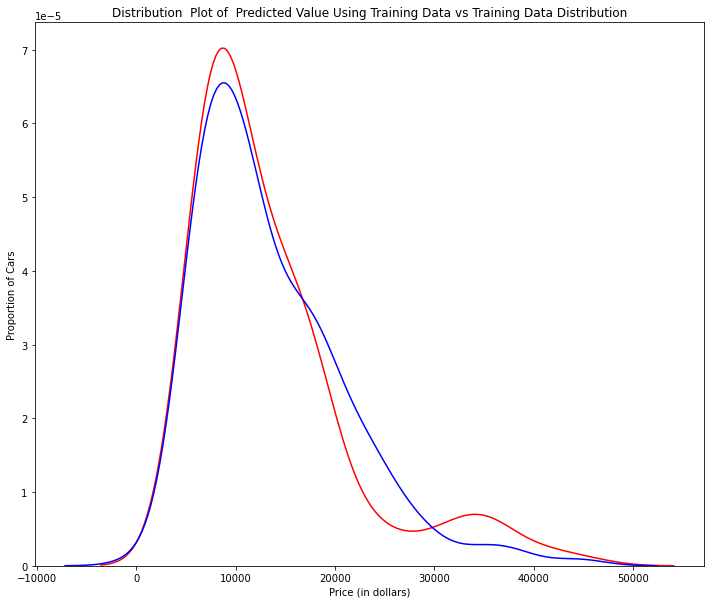

In [39]:
Title = "Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values(train)", "Predicted Values(train)", Title)

Ploting the distribution plot for test data:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


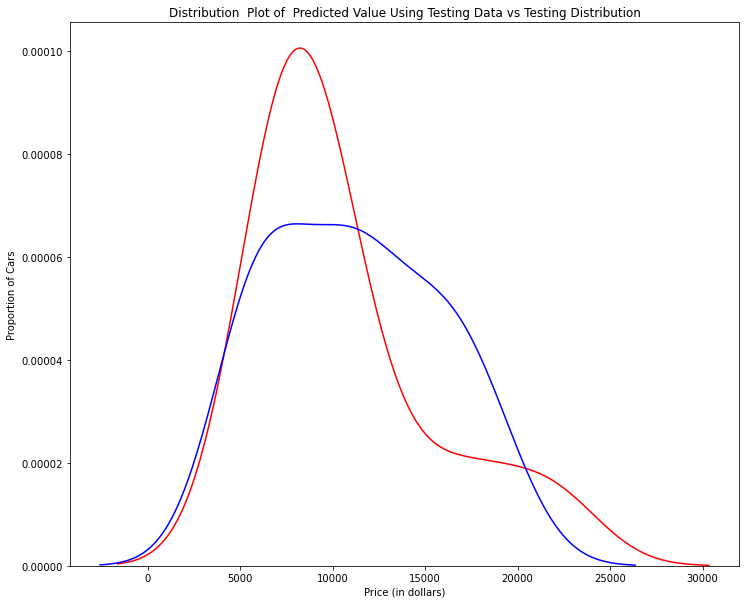

In [40]:
Title = "Distribution  Plot of  Predicted Value Using Testing Data vs Testing Distribution"
DistributionPlot(y_test, yhat_test, "Actual Values(test)", "Predicted Values(test)", Title)

<p>Comparing the two figure, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


In [41]:
from sklearn.preprocessing import PolynomialFeatures

Let's use 55 percent of the data for training and the rest for testing:


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [43]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5)

We now create a linear regression poly and train it 

In [44]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [45]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63658259,  7307.96945632, 12213.77686795, 18893.28704901,
       19995.99382148])

Comparing the predicted value with the true value:

In [46]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.63658259  7307.96945632 12213.77686795 18893.28704901]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


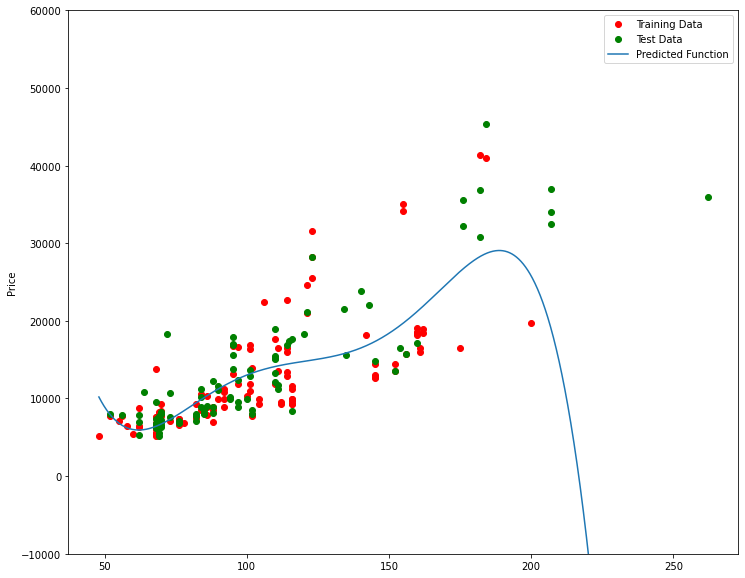

In [47]:
PollyPlot(x_train[['horsepower']].values, x_test[['horsepower']].values, y_train.values, y_test.values, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


Let us calculate the value of R^2 for training and test data:

In [48]:
poly.score(x_train_pr, y_train)

0.5567716901586273

In [49]:
poly.score(x_test_pr, y_test)

-29.871297443750265

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let us see how R^2 changes for different order polynomial for test data:

Text(3, 0.75, 'Maximum R^2 ')

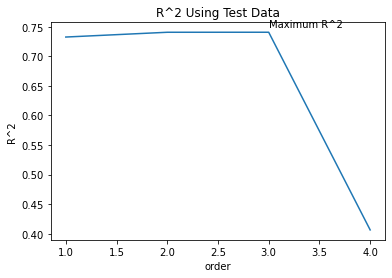

In [53]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    poly.fit(x_train_pr, y_train)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


<h1> Question  4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

In [54]:
pr1 = PolynomialFeatures(degree=2)

<h1> Question  4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

x_train_pr1 = pr1.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
x_test_pr1 = pr1.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])

<h1> Question  4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>

In [63]:
x_train_pr1.shape

(110, 15)

There are 15 new features

In [64]:
x_test_pr1.shape

(91, 15)

There are 15 new features

<h1> Question  4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>

In [65]:
poly1 = LinearRegression()

poly1.fit(x_train_pr1,y_train)

LinearRegression()

<h1> Question  4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>

In [67]:
yhat1_test = poly1.predict(x_test_pr1)
yhat1_test[0:5]

array([ 6303.02917846, 10402.8714811 , 20516.37185612, 19273.87340822,
       20555.5169455 ])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


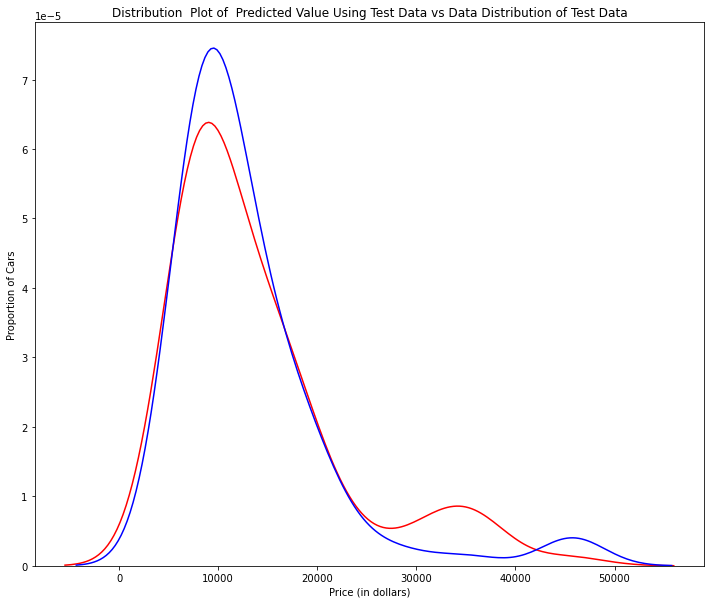

In [68]:
Title = "Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data"
DistributionPlot(y_test, yhat1_test, "Actual Value(test)", "Predicted Value(test)", Title )

<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

We can say that the two points where model is inaccurate are near $10,000 where it predicts more price and near region between $30,000 to $40,000 where it predicts value less than actual values

<h2 id="ref3">3.) Ridge Regression</h2> 


Let's perform a degree two polynomial transformation on our data.


In [70]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg", "normalized-losses", "symboling"]])
x_test_pr = pr.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg", "normalized-losses", "symboling"]])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [71]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=1)

In [75]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [76]:
yhat = RidgeModel.predict(x_test_pr)
yhat[0:4]

array([ 6570.82441941,  9636.24891471, 20949.92322737, 19403.60313255])

In [76]:
RidgeModel.score(yha)

array([ 6570.82441941,  9636.24891471, 20949.92322737, 19403.60313255])

Let us compare the output of predicted and actual values:

In [74]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [79]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:01<00:00, 554.51it/s, Test Score=0.564, Train Score=0.859]


Let's plot the value :

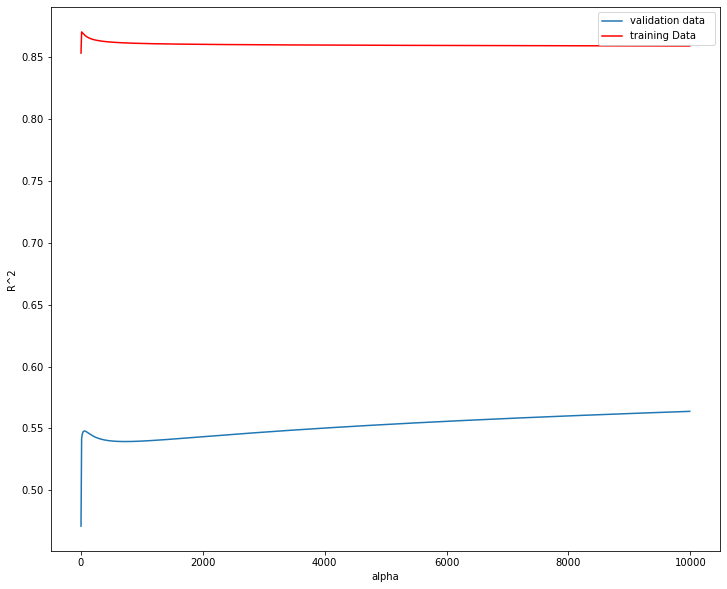

In [81]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h2 id="ref4">4.) Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let us import GridSearch from sklearn

In [82]:
from sklearn.model_selection import GridSearchCV

We create dictionary of parameter:

In [83]:
parameter = [{"alpha":[0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameter

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creat Ridge Regression object:

In [84]:
RR = Ridge()

Create Ridge Grid Serach object:

In [85]:
grid1 = GridSearchCV(RR, parameter, cv = 4)

Fit the model:

In [86]:
 grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [90]:
BESTRR = grid1.best_estimator_
BESTRR

Ridge(alpha=10000)

We now test our model on the test data:


In [92]:
BESTRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036148